In [5]:
import pandas as pd
import os as os

# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
# **Reading each file in the BrokenTooth and Healthy directories and appending it to the respective lists as pandas' DataFrame object (abbr.: df)
for file_name in os.listdir(pth1):
    this_df = pd.read_csv(os.path.join(pth1, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 0
    broken.append(this_df)
    #print(this_df.head(5))
#print(broken[0].count())

# print(broken[1].head(5))
#print(broken[0].describe())
# print(broken[0]['a1'].head(5))

for file_name in os.listdir(pth2):
    this_df = pd.read_csv(os.path.join(pth2, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 1
    healthy.append(this_df)
    #print(this_df.head(5))

#print(healthy[1].head(5))
# print(healthy[1].describe())
#print(healthy[1]['a1'].head(5))

In [6]:
#time series graph - (add blocks from here)


In [7]:
# Aggregating dataset for broken and healthy 
broken_agg = broken[0]
healthy_agg = healthy[0]
for i in range(1,10):
    broken_agg = pd.concat([broken_agg, broken[i]], ignore_index=True)
    healthy_agg = pd.concat([healthy_agg, healthy[i]], ignore_index=True)

In [11]:
broken_agg.describe()

,a1,a2,a3,a4,load,gearbox_status
count,1.005311e+06,1.005311e+06,1.005311e+06,1.005311e+06,1.005311e+06,1005311.0
mean,-1.037558e-03,1.731702e-03,7.305638e-04,1.339568e-03,4.547998e+01,0.0
std,4.602696e+00,4.389516e+00,3.808909e+00,4.408367e+00,2.900204e+01,0.0
min,-2.534610e+01,-3.250230e+01,-2.585610e+01,-2.739530e+01,0.000000e+00,0.0
25%,-2.771530e+00,-2.469080e+00,-2.030490e+00,-2.365505e+00,2.000000e+01,0.0
50%,-5.425910e-02,1.257260e-01,4.504200e-02,1.012820e-01,5.000000e+01,0.0
75%,2.668080e+00,2.679470e+00,2.104100e+00,2.444225e+00,7.000000e+01,0.0
max,2.637010e+01,2.467780e+01,2.693890e+01,3.236610e+01,9.000000e+01,0.0


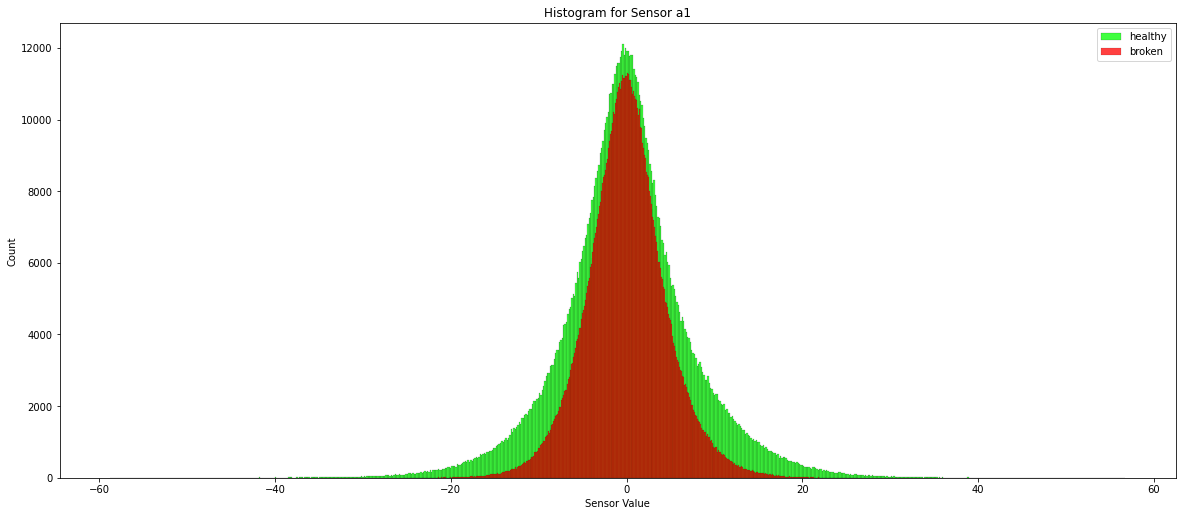

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Agregrating total dataset
# bh_agg = pd.concat([healthy_agg, broken_agg], ignore_index=True)

# a1 = bh_agg.iloc[:,:1]
plt.figure(figsize=(20,35*10))
gs = gridspec.GridSpec(35, 1)
ax = plt.subplot(gs[i])
ax.set_xlabel('Sensor Value')
ax.set_title('Histogram for Sensor a1')

# sns.distplot(a1[bh_agg.gearbox_status == 1])
# sns.distplot(a1[bh_agg.gearbox_status == 0])
sns.histplot(data=healthy_agg, x='a1', color="lime")
sns.histplot(data=broken_agg, x='a1', color="red")

plt.legend(['healthy', 'broken'])
plt.show()


In [10]:
import math 

def divide_into(df, n):
    group_size = n #math.ceil(df['a1'].count()/n)
    df_groups = []
    for i in range(math.ceil(df['a1'].count()/group_size)):
        df_groups.append(df.iloc[i*group_size:(i+1)*group_size, :-2])
    return pd.DataFrame(map(pd.DataFrame.std, df_groups))

broken_stdev = []
for i in range(0,10):
    broken_stdev.append(divide_into(broken[i], 100))


#print(broken_stdev[1])


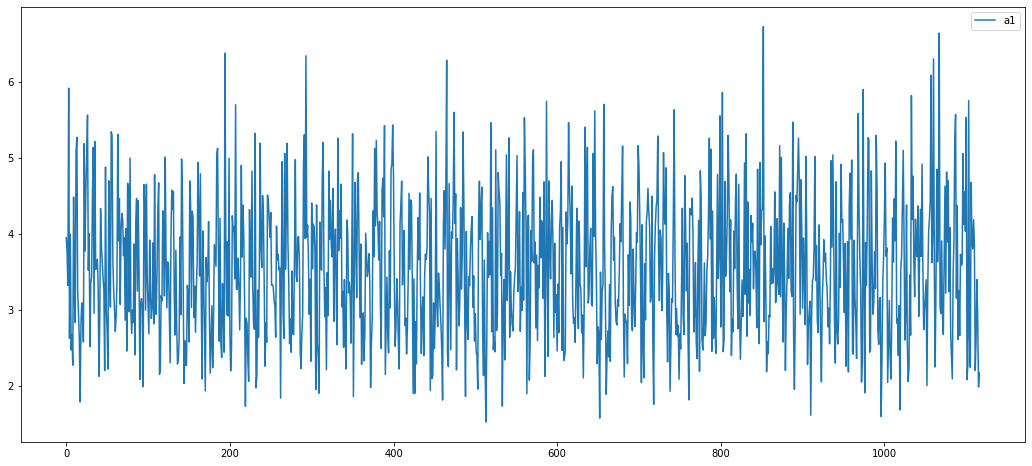

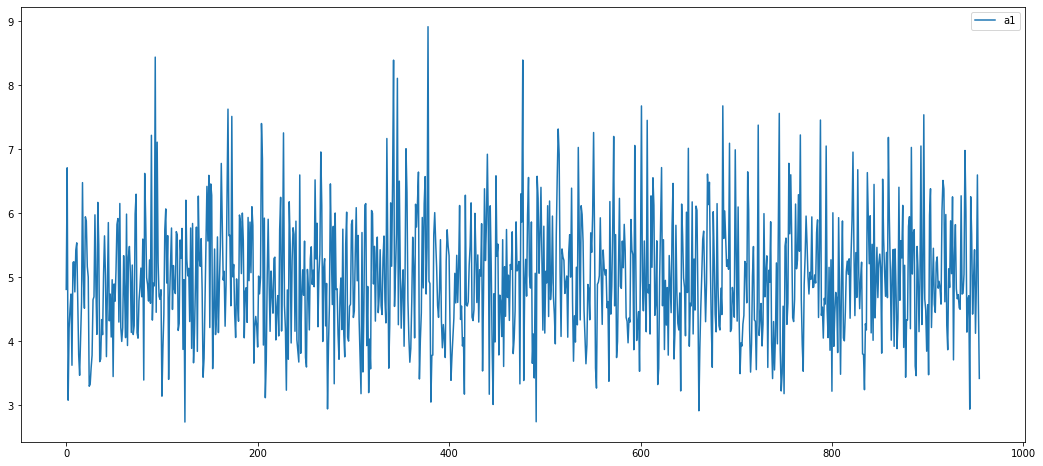

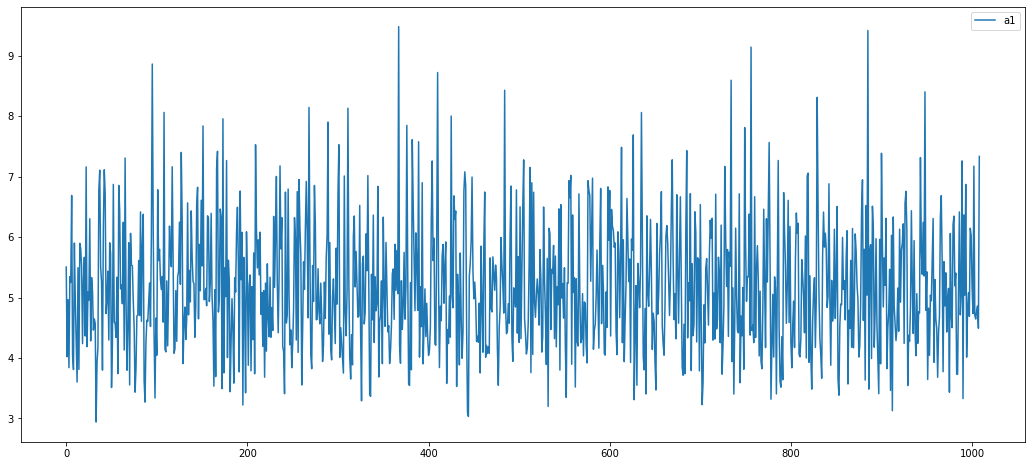

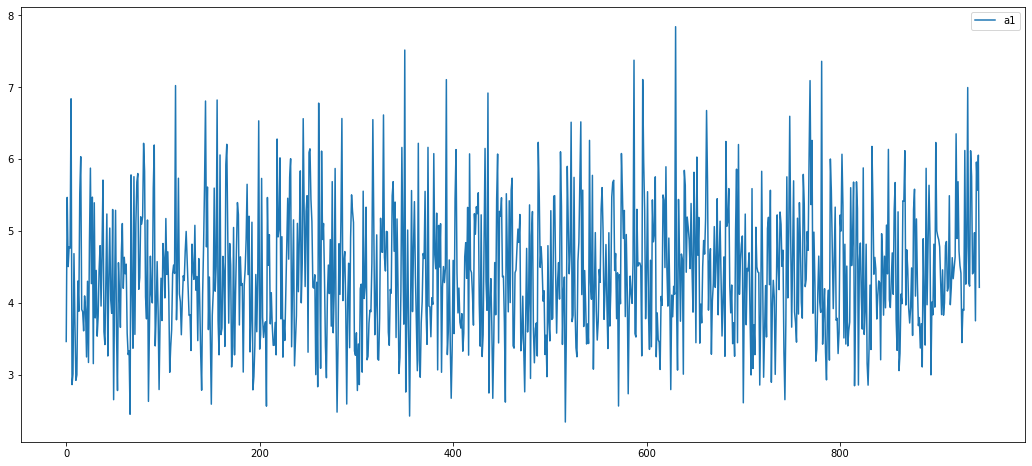

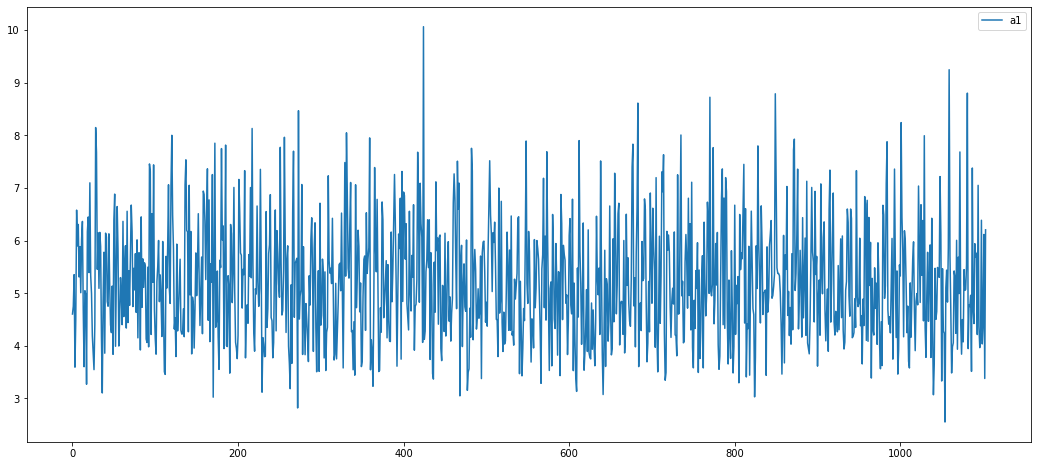

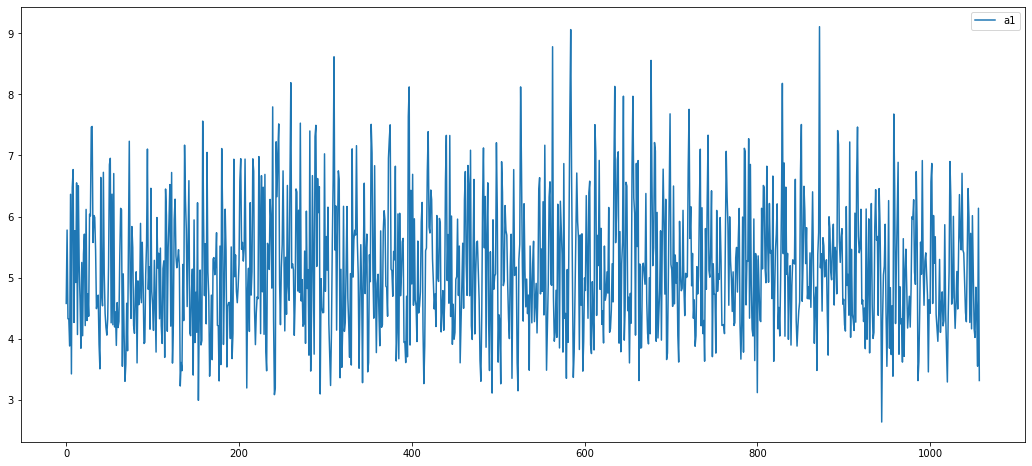

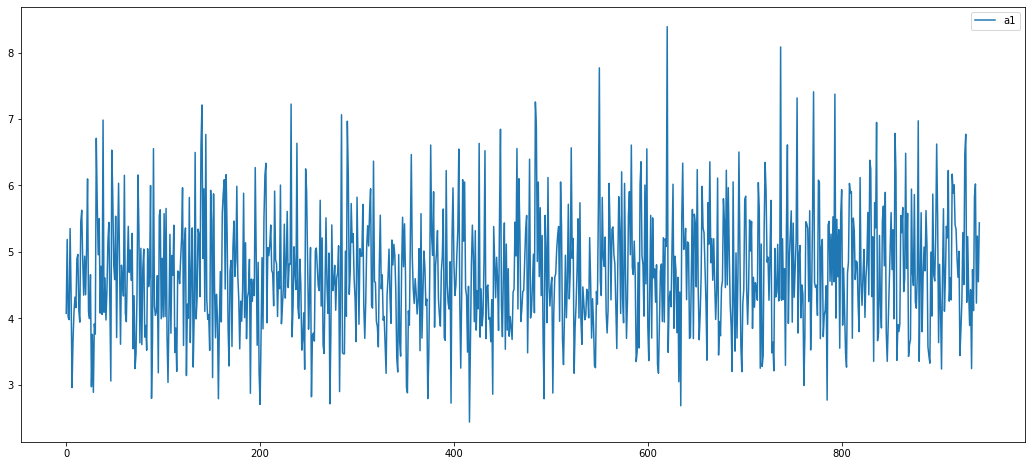

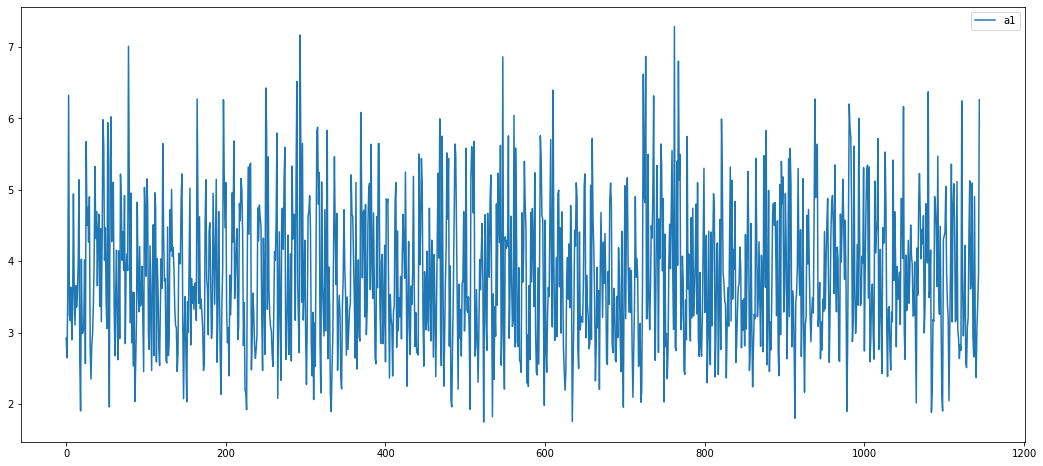

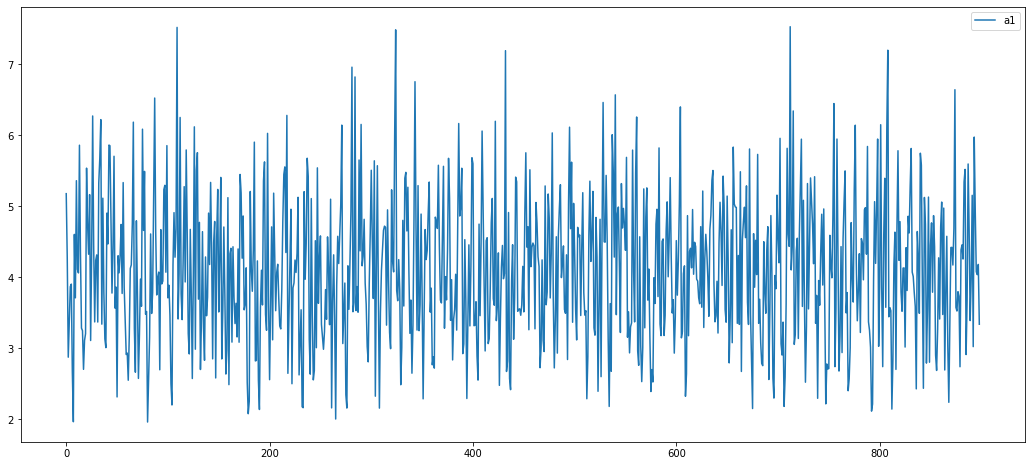

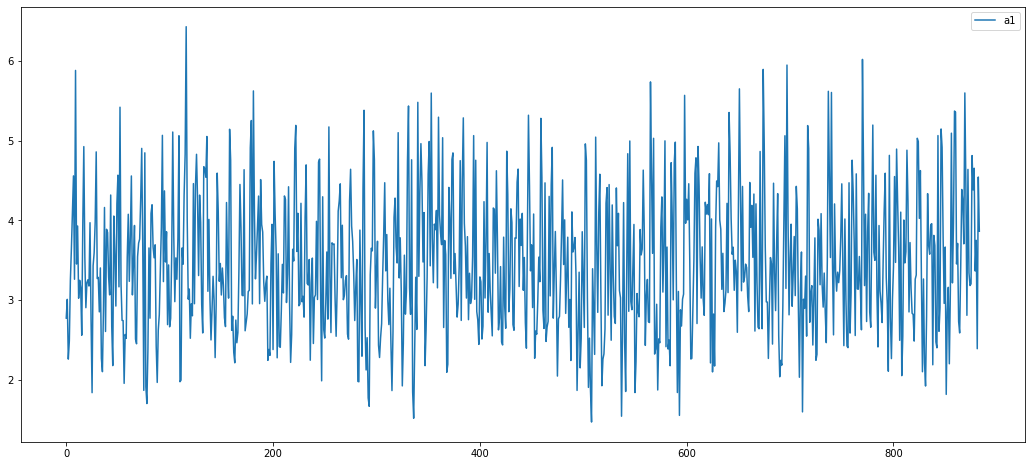

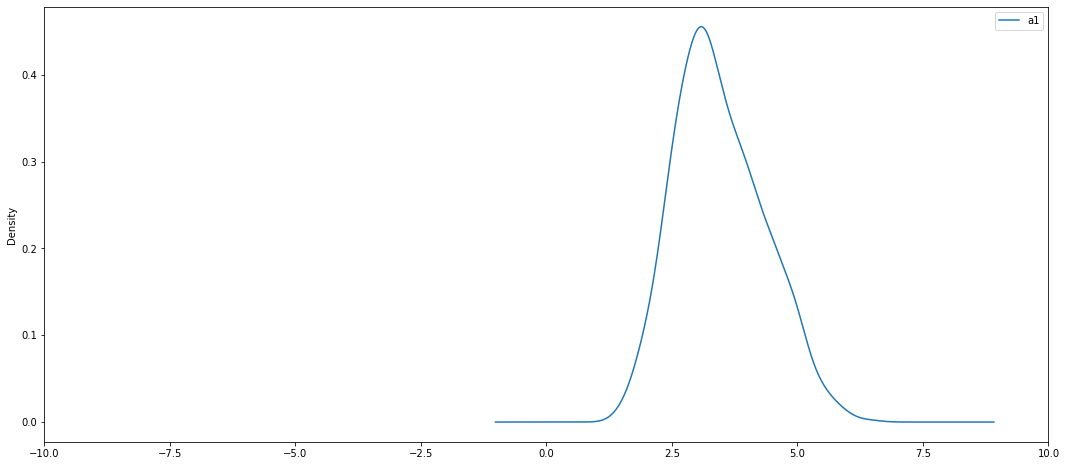

In [36]:
import matplotlib.pyplot as plt
from pylab import rcParams
for i in range(0,10):
    time_serie = broken_stdev[i].iloc[:,:1]
    rcParams['figure.figsize'] = 18, 8
    time_serie.plot()
    plt.show()

time_serie.plot(kind='kde')
plt.xlim(-10, 10)
plt.show()